In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from pylab import rcParams
from scipy.stats import shapiro
from statsmodels.tsa.stattools import adfuller

In [2]:
ipc = pd.DataFrame(yf.Ticker("^MXX").history(start="2019-04-30", end="2021-04-30", interval= "1wk")["Close"])

In [3]:
ipc.head()

,Close
Date,
2019-04-29,44277.238281
2019-05-06,43382.351562
2019-05-13,43445.621094
2019-05-20,42617.601562
2019-05-27,42749.160156


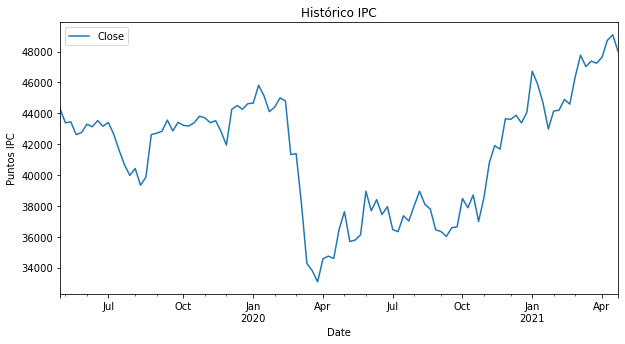

In [4]:
ipc.plot(figsize=(10,5));
plt.ylabel("Puntos IPC");
plt.title("Histórico IPC");

#### 1. Componente de Autocorrelación y Autocorrelación Parcial

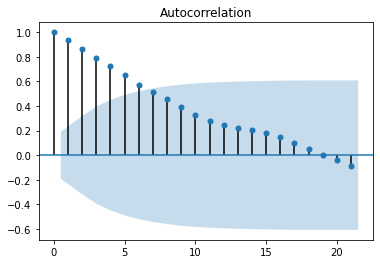

In [5]:
plot_acf(ipc);

Componente de autocorrelación igual a 5

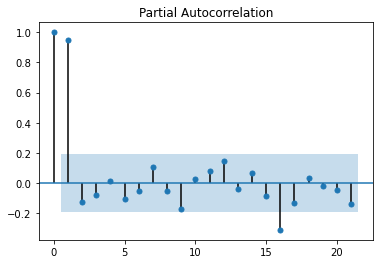

In [6]:
plot_pacf(ipc);

Componente de autocorrelación parcial igual a 1

#### 2. Prueba de Heterocedasticidad

#### 3. Prueba de Normalidad

In [31]:
stat, p = shapiro(ipc)

In [34]:
alpha = 0.05
if p > alpha:
    print('Es normal')
else:
    print('No es normal')

No es normal


#### 4. Estacionalidad

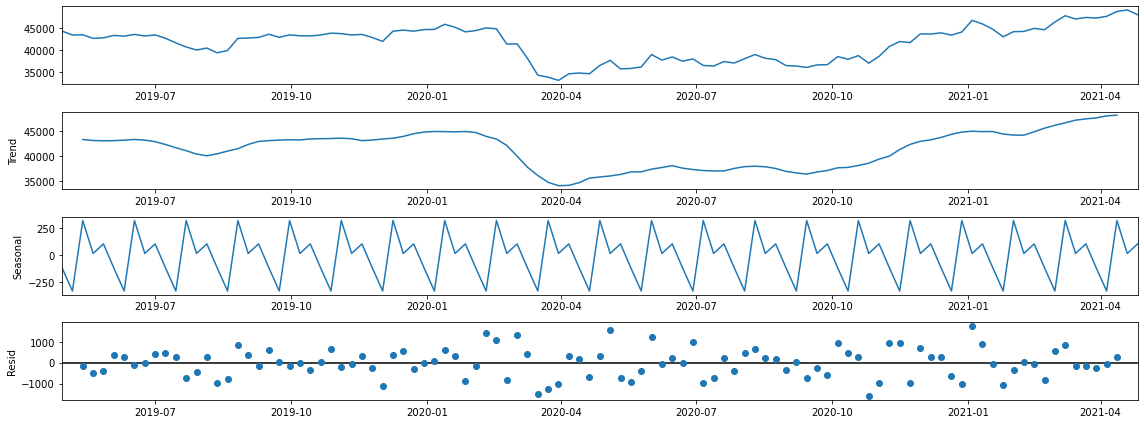

In [92]:
rcParams['figure.figsize'] = 16, 6
decomposition = sm.tsa.seasonal_decompose(ipc, model='additive', period=5)
fig = decomposition.plot()
plt.show()

#### 5. Estacionariedad

In [61]:
def estacionariedad(serie_de_tiempo):
    ## Test de DICKEY-FULLER
    adf_test = adfuller(serie_de_tiempo)
    if adf_test[1] > 0.05:
        print("No es estacionaria")
    else:
        print("Es estacionaria")

In [62]:
estacionariedad(ipc)

No es estacionaria


#### 6. Detección de Atípicos